### Perceptrons for Classification


- Make sure to install sklearn library.
- %pip install -U scikit-learn


In [2]:
import numpy as np
from sklearn import datasets
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt 
import tensorflow as tf
import pandas as pd


- Load the data Faces in the Wild from sklearn.datasets 

In [11]:
data = pd.read_excel(r'C:\Users\Basil\Downloads\Lab2_data.xlsx')

print(data)
d = data.pop('d')


        x1      x2      x3      x4  d
0   0.4329 -1.3719  0.7022 -0.8535  1
1   0.3024  0.2286  0.8630  2.7909 -1
2   0.1349 -0.6445  1.0530  0.5687 -1
3   0.3374 -1.7163  0.3670 -0.6283 -1
4   1.1434 -0.0485  0.6637  1.2606  1
5   1.3749 -0.5071  0.4464  1.3009  1
6   0.7221 -0.7587  0.7681 -0.5592  1
7   0.4403 -0.8072  0.5154 -0.3129  1
8  -0.5231  0.3548  0.2538  1.5776 -1
9   0.3255 -2.0000  0.7112 -1.1209  1
10  0.5824  1.3915 -0.2291  4.1735 -1
11  0.1340  0.6081  0.4450  3.2230 -1
12  0.1480 -0.2988  0.4778  0.8649  1
13  0.7359  0.1869 -0.0872  2.3584  1
14  0.7115 -1.1469  0.3394  0.9573 -1
15  0.8251 -1.2840  0.8452  1.2382 -1
16  0.1569  0.3712  0.8825  1.7633  1
17  0.0033  0.6835  0.5389  2.8249 -1
18  0.4243  0.8313  0.2634  3.5855 -1
19  1.0490  0.1326  0.9138  1.9792  1
20  1.4276  0.5331 -0.0145  3.7286  1
21  0.5971  1.4865  0.2904  4.6069 -1
22  0.8475  2.1479  0.3179  5.8235 -1
23  1.3967 -0.4171  0.6443  1.3927  1
24  0.0044  1.5378  0.6099  4.7755 -1
25  0.2201 -

In [12]:
tf_dataset = tf.data.Dataset.from_tensor_slices((data.values, d.values))
x,y = [],[]
for feature,value in tf_dataset.as_numpy_iterator() :
    x.append(feature)
    y.append(value)
    
x

[array([ 0.4329, -1.3719,  0.7022, -0.8535]),
 array([0.3024, 0.2286, 0.863 , 2.7909]),
 array([ 0.1349, -0.6445,  1.053 ,  0.5687]),
 array([ 0.3374, -1.7163,  0.367 , -0.6283]),
 array([ 1.1434, -0.0485,  0.6637,  1.2606]),
 array([ 1.3749, -0.5071,  0.4464,  1.3009]),
 array([ 0.7221, -0.7587,  0.7681, -0.5592]),
 array([ 0.4403, -0.8072,  0.5154, -0.3129]),
 array([-0.5231,  0.3548,  0.2538,  1.5776]),
 array([ 0.3255, -2.    ,  0.7112, -1.1209]),
 array([ 0.5824,  1.3915, -0.2291,  4.1735]),
 array([0.134 , 0.6081, 0.445 , 3.223 ]),
 array([ 0.148 , -0.2988,  0.4778,  0.8649]),
 array([ 0.7359,  0.1869, -0.0872,  2.3584]),
 array([ 0.7115, -1.1469,  0.3394,  0.9573]),
 array([ 0.8251, -1.284 ,  0.8452,  1.2382]),
 array([0.1569, 0.3712, 0.8825, 1.7633]),
 array([0.0033, 0.6835, 0.5389, 2.8249]),
 array([0.4243, 0.8313, 0.2634, 3.5855]),
 array([1.049 , 0.1326, 0.9138, 1.9792]),
 array([ 1.4276,  0.5331, -0.0145,  3.7286]),
 array([0.5971, 1.4865, 0.2904, 4.6069]),
 array([0.8475, 

- Now we have to standardize the training and test sets by removing the mean and scaling to unit variance.

In [20]:

scaler = StandardScaler()
scaler.fit(x)

Xtrs =  scaler.transform(x)


- We plot two features from the training dataset according to their labels.

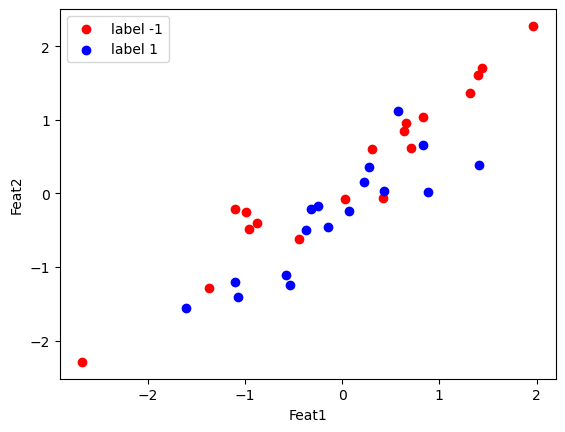

In [21]:


ntr = Xtrs.shape[0]
feat1_neg = [Xtrs[ii,1] for ii in range(0, ntr) if y[ii]==-1]
feat2_neg = [Xtrs[ii,3] for ii in range(0, ntr) if y[ii]==-1]
feat1_pos = [Xtrs[ii,1] for ii in range(0, ntr) if y[ii]==1]
feat2_pos = [Xtrs[ii,3] for ii in range(0, ntr) if y[ii]==1]

plt.scatter(feat1_neg, feat2_neg, color = "r", label="label -1")
plt.scatter(feat1_pos, feat2_pos, color = "b", label="label 1")
plt.legend()
plt.xlabel('Feat1')
plt.ylabel('Feat2')
plt.show()

- Complete the class Perceptron_Classifier

In [18]:
class Perceptron_Classifier:

    def __init__(self, dim,eta=0.1):
        self.w = np.zeros((dim, 1))
        self.ws = [self.w.copy()]
        self.eta = 1e-1
        
    def predict(self,x):
        pred = x @ self.w
        return np.sign(pred)
        
    def model_update(self,x,y,pred):
        self.w = self.w + (self.eta *((y-pred) * x[:,np.newaxis]))


- Compute the accuracy of training and test sets for each epoch, and hold them in two lists.

In [23]:
Xtrs1 = np.insert(Xtrs, 0, 1, axis=1) 

epoch = 100

ptr = []
acctr = []
#accte = []

model = Perceptron_Classifier(dim=Xtrs1.shape[1],eta=0.1)

for itr in range(epoch):
    tr_miss = 0
    for i in range(Xtrs.shape[0]):
                      
        predict = model.predict(Xtrs1[i, :])
        
        if y[i] != predict:                   
            model.model_update(Xtrs1[i, :],y[i],predict)  
            tr_miss += 1
    ptr.append(tr_miss)
    acctr.append(accuracy_score(y, model.predict(Xtrs1)))
w = model.w.copy()

In [24]:
print('Accuracy on train set =', accuracy_score(y, model.predict(Xtrs1)))

Accuracy on train set = 0.9428571428571428


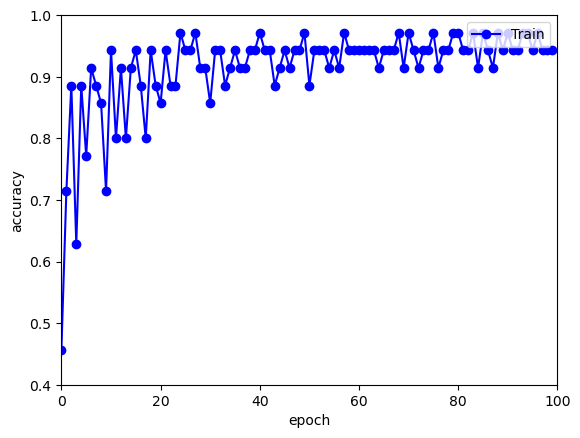

In [27]:
xs = [i for i in range(0,epoch)]
plt.plot(xs, acctr,"ob-", label="training")
plt.xlim(0, epoch)
plt.ylim(0.4, 1)
plt.legend(('Train', 'Test'),loc='upper right')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.show()
